# Customer Segmentation

Customer Segmentation - Group Project
Customer Segmentation
Problem Statement:  XYZ bank wants to roll out Christmas offers to their customers. But Bank does not want to roll out same offer to all customers  instead they want to roll out personalized offer to particular set of customers. If they manually start understanding the category of customer then this will be not efficient and also they will not be able to uncover the hidden pattern in the data ( pattern which group certain kind of customer in one category). Bank approached ABC analytics company to solve their problem. Bank also shared information with ABC analytics that they don't want more than 5 group as this will be inefficient for their campaign.

ML Problem: ABC analytics proposed customer segmentation approach to Bank.

ABC analytics assigned this talk to their analytics team and instructed their team to come up with the approach and feature which group similar behavior customer in one category and others in different category.

Note: Please read problem statement carefully and propose the approach which should be as per the customer requirement.

Task:

1. Business Understanding

2. Data Understanding

3. EDA

4. Feature Engineering

4. Model Building

5. Model Evaluation

6. Presentation (Recommendation slide is must)

7. Document the challenges

|**Column Name**|Description|
| --- | ---|
|**fecha_dato**|The table is partitioned for this column|
|**ncodpers**|	Customer code|
|**ind_empleado**|Employee index: A active, B ex employed, F filial, N not employee, P pasive|
|**pais_residencia**|Customer's Country residence|
|**sexo**|Customer's sex|
|**age**|Age|
|**fecha_alta**|The date in which the customer became as the first holder of a contract in the bank|
|**ind_nuevo**|New customer Index. 1 if the customer registered in the last 6 months|
|**antiguedad**|Customer seniority (in months)|
|**indrel**|1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)|
|**ult_fec_cli_1t**|Last date as primary customer (if he isn't at the end of the month)|
|**indrel_1mes**|Customer type at the beginning of the month: 1 (First/Primary customer), 2 (co-owner), P (Potential), 3 (former primary), 4(former co-owner)|
|**tiprel_1mes**|Customer relation type at the beginning of the month: A (active), I (inactive), P (former customer), R (Potential)|
|**indresi**|Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)|
|**indext**|Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)|
|**conyuemp**|Spouse index. 1 if the customer is spouse of an employee|
|**canal_entrada**|channel used by the customer to join|
|**indfall**|Deceased index. N/S|
|**tipodom**|Addres type. 1, primary address|
|**cod_prov**|Province code (customer's address)|
|**nomprov**|Province name|
|**ind_actividad_cliente**|Activity index (1, active customer; 0, inactive customer)|
|**renta**|Gross income of the household|
|**ind_ahor_fin_ult1**|Saving Account|
|**ind_aval_fin_ult1**|Guarantees|
|**ind_cco_fin_ult1**|Current Accounts|
|**ind_cder_fin_ult1**|Derivada Account|
|**ind_cno_fin_ult1**|Payroll Account|
|**ind_ctju_fin_ult1**|Junior Account|
|**ind_ctma_fin_ult1**|Más particular Account|
|**ind_ctop_fin_ult1**|particular Account|
|**ind_ctpp_fin_ult1**|particular Plus Account|
|**ind_deco_fin_ult1**|Short-term deposits|
|**ind_deme_fin_ult1**|Medium-term deposits|
|**ind_dela_fin_ult1**|Long-term deposits|
|**ind_ecue_fin_ult1**|e-account|
|**ind_fond_fin_ult1**|Funds|
|**ind_hip_fin_ult1**|Mortgage|
|**ind_plan_fin_ult1**|Pensions|
|**ind_pres_fin_ult1**|Loans|
|**ind_reca_fin_ult1**|Taxes|
|**ind_tjcr_fin_ult1**|Credit Card|
|**ind_valo_fin_ult1**|Securities|
|**ind_viv_fin_ult1**|Home Account|
|**ind_nomina_ult1**|Payroll|
|**ind_nom_pens_ult1**|Pensions|
|**ind_recibo_ult1**|Direct Debit|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.io as pio
template = 'simple_white'

import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

seed = 42

In [2]:
df = pd.read_csv("C:/Users/joean/Desktop/Data Science/Personal Projects/cust_seg.csv")
df

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2015-02-28,1183296,N,ES,H,27,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1
999996,999996,2015-02-28,1183295,N,ES,H,56,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,0
999997,999997,2015-02-28,1183294,N,ES,V,39,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1
999998,999998,2015-02-28,1183293,N,ES,V,36,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1000000 non-null  int64  
 1   fecha_dato             1000000 non-null  object 
 2   ncodpers               1000000 non-null  int64  
 3   ind_empleado           989218 non-null   object 
 4   pais_residencia        989218 non-null   object 
 5   sexo                   989214 non-null   object 
 6   age                    1000000 non-null  object 
 7   fecha_alta             989218 non-null   object 
 8   ind_nuevo              989218 non-null   float64
 9   antiguedad             1000000 non-null  object 
 10  indrel                 989218 non-null   float64
 11  ult_fec_cli_1t         1101 non-null     object 
 12  indrel_1mes            989218 non-null   float64
 13  tiprel_1mes            989218 non-null   object 
 14  indresi            

In [4]:
df.columns

Index(['Unnamed: 0', 'fecha_dato', 'ncodpers', 'ind_empleado',
       'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo',
       'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes',
       'indresi', 'indext', 'conyuemp', 'canal_entrada', 'indfall', 'tipodom',
       'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

Dropping first two columns as they do not give much information.

In [5]:
df = df.iloc[:,2:]
df.head()

,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
2,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
3,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
4,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0


#### Checking for duplicate observations

`ncoderpers` contains customer codes. Lets check if there are duplicate customer codes

In [6]:
df['ncodpers'].value_counts()

281941     2
362212     2
362218     2
362219     2
362220     2
          ..
1310578    1
1310579    1
1310645    1
1310643    1
1183305    1
Name: ncodpers, Length: 626159, dtype: int64

There are duplicate customer codes. Since the bank wants to segment unique customers, I will drop observations with duplicate customer codes and keep only the last observation for each duplicated customer code observation.

In [7]:
df = df.drop_duplicates(subset = ['ncodpers'], keep = "last").reset_index(drop = True)
print(df.shape)

(626159, 46)


In [8]:
1000000 - 626159

373841

Approximately 370K+ suplicated observation has been removed.

In [9]:
df['ncodpers'].value_counts().sum()

626159

Now, all customer codes are unique. I will drop this variable has customer code does not give any information for customer segmentation.

In [10]:
df = df.drop('ncodpers', axis = 1)
df.head()

,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


#### Checking for missing values

In [11]:
#checking percentage of missing values for every variable.
df.isna().sum()/len(df)*100

ind_empleado              1.115531
pais_residencia           1.115531
sexo                      1.115851
age                       0.000000
fecha_alta                1.115531
ind_nuevo                 1.115531
antiguedad                0.000000
indrel                    1.115531
ult_fec_cli_1t           99.876549
indrel_1mes               1.115531
tiprel_1mes               1.115531
indresi                   1.115531
indext                    1.115531
conyuemp                 99.985786
canal_entrada             1.123676
indfall                   1.115531
tipodom                   1.115531
cod_prov                  1.703561
nomprov                   1.703561
ind_actividad_cliente     1.115531
renta                    17.841475
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1         0.000000
ind_cno_fin_ult1          0.000000
ind_ctju_fin_ult1         0.000000
ind_ctma_fin_ult1         0.000000
ind_ctop_fin_ult1   

Deleting variables having percentage of missing values higher than 20%

In [12]:
missing_info = (df.isna().sum()/len(df)*100)

to_drop = missing_info[missing_info.values > 20].index #setting threshold

print(f"columns to drop: {to_drop}")
print()

df = df.drop(to_drop, axis = 1).reset_index(drop = True)
print(df.shape)

columns to drop: Index(['ult_fec_cli_1t', 'conyuemp'], dtype='object')

(626159, 43)


Checking unique values for each variable

In [13]:
for col in df.columns:
    print(col, ":", df[col].unique())
    print()

ind_empleado : ['N' nan 'A' 'B' 'F' 'S']

pais_residencia : ['ES' nan 'CA' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE'
 'US' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN'
 'TW' 'PL' 'IN' 'CR' 'NI' 'HK' 'AE' 'MA' 'GR' 'PR' 'RO' 'IL' 'RU' 'GT'
 'GA' 'NO' 'SN' 'MR' 'UA' 'BG' 'PY' 'EE' 'SV' 'CZ' 'ET' 'CM' 'SA' 'CI'
 'QA' 'SG' 'BO' 'BZ' 'UY' 'MD' 'BA' 'CF' 'KR' 'LU' 'NG' 'CD' 'ZA' 'AU'
 'KZ' 'CU' 'DK' 'JP' 'SK' 'GM' 'AO' 'HR' 'PK' 'PA' 'MK' 'LY' 'LT' 'TH'
 'GQ' 'GN' 'TR' 'IS' 'KE' 'VN' 'RS' 'AD' 'NZ' 'OM' 'EG' 'LV' 'ML' 'CG'
 'GW' 'HU' 'DZ' 'SL' 'GI' 'KH' 'MM' 'BY' 'PH' 'KW' 'GH' 'TN' 'TG' 'LB'
 'GE']

sexo : ['H' 'V' nan]

age : [' 35' ' 23' ' 22' ' 24' ' 65' ' 28' ' 25' ' 26' ' 53' ' 27' ' 32' ' 37'
 ' 31' ' 39' ' 63' ' 33' ' 55' ' 42' ' 58' ' 38' ' 50' ' 30' ' 45' ' 44'
 ' 36' ' 29' ' 60' ' 57' ' 67' ' 47' ' NA' ' 34' ' 48' ' 46' ' 54' ' 84'
 ' 15' ' 12' '  8' '  6' ' 83' ' 40' ' 77' ' 69' ' 52' ' 59' ' 43' ' 10'
 '  9' ' 49' ' 41' ' 51' ' 78' ' 16' ' 1

Lets analyze each variable. First I will begin with `ind_empleado` and filter those observations with missing values.

#### `ind_empleado`: Employee index

In [14]:
df[df['ind_empleado'].isna()]

,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
261,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1029,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1063,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1154,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1779,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624939,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
625270,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0
625274,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
625736,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0


In [15]:
df[df['ind_empleado'].isna()].isna().sum()

ind_empleado             6985
pais_residencia          6985
sexo                     6985
age                         0
fecha_alta               6985
ind_nuevo                6985
antiguedad                  0
indrel                   6985
indrel_1mes              6985
tiprel_1mes              6985
indresi                  6985
indext                   6985
canal_entrada            6985
indfall                  6985
tipodom                  6985
cod_prov                 6985
nomprov                  6985
ind_actividad_cliente    6985
renta                    6985
ind_ahor_fin_ult1           0
ind_aval_fin_ult1           0
ind_cco_fin_ult1            0
ind_cder_fin_ult1           0
ind_cno_fin_ult1            0
ind_ctju_fin_ult1           0
ind_ctma_fin_ult1           0
ind_ctop_fin_ult1           0
ind_ctpp_fin_ult1           0
ind_deco_fin_ult1           0
ind_deme_fin_ult1           0
ind_dela_fin_ult1           0
ind_ecue_fin_ult1           0
ind_fond_fin_ult1           0
ind_hip_fi

There are about 6985 observation having missing values across multiple columns. It would be impossible to impute these observations with meaning full information as other columns belonging to same observation has missing values too. Therefore, I will drop these observations.

In [16]:
to_drop = df[df['ind_empleado'].isna()].index

df = df.drop(index = to_drop, axis = 0).reset_index(drop = True)
print(df.shape)

(619174, 43)


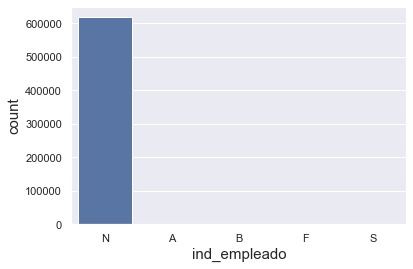

In [17]:
sns.countplot(df['ind_empleado']);

In [18]:
print(df['ind_empleado'].value_counts())
print()
print(df['ind_empleado'].value_counts(normalize = True)*100)

N    618694
B       194
A       144
F       141
S         1
Name: ind_empleado, dtype: int64

N    99.922477
B     0.031332
A     0.023257
F     0.022772
S     0.000162
Name: ind_empleado, dtype: float64


Employee index: 
* A: active, 
* B: ex employed, 
* F: filial, 
* N: not employee, 
* P: pasive

Almost all customers are active. Only a small negligible portion of customers belong to other categories. 

#### `pais_residencia`: Customer's Country residence

In [19]:
any(df['pais_residencia'].isna()) # No Missing values

False

In [20]:
print(df['pais_residencia'].value_counts())
print()
df['pais_residencia'].value_counts(normalize = True)*100

ES    615491
FR       288
AR       276
DE       257
GB       254
       ...  
CD         1
KZ         1
GM         1
IS         1
GE         1
Name: pais_residencia, Length: 113, dtype: int64



ES    99.405175
FR     0.046514
AR     0.044576
DE     0.041507
GB     0.041022
        ...    
CD     0.000162
KZ     0.000162
GM     0.000162
IS     0.000162
GE     0.000162
Name: pais_residencia, Length: 113, dtype: float64

99.4% of customers are from spain.

#### `sexo`: Customer's Gender

In [21]:
df['sexo'].isna().sum() 

#We can impute this in later session.

2

In [22]:
df['sexo'] = df['sexo'].fillna(df['sexo'].mode()[0])

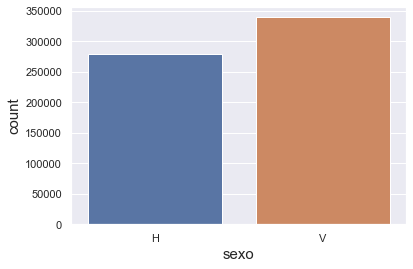

In [23]:
sns.countplot(df['sexo']);

'V' category is higher in proportion compared to 'H'

#### `age`: Age

In [24]:
df['age']

0          35
1          23
2          23
3          22
4          23
         ... 
619169     27
619170     56
619171     39
619172     36
619173     38
Name: age, Length: 619174, dtype: object

This variable is supposed to be numerical, but currently it is of object data type. In order to convert this variable to numerical, the 'NA' value must be dealt with first.

In [25]:
df.query('age == " NA"')

,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1


Luckily, when dealing with missing values in `ind_empleado`, the NA values in `age` has also been removed.

In [26]:
#Converting age to numerical
df['age'] = df['age'].str.strip().astype('int64')

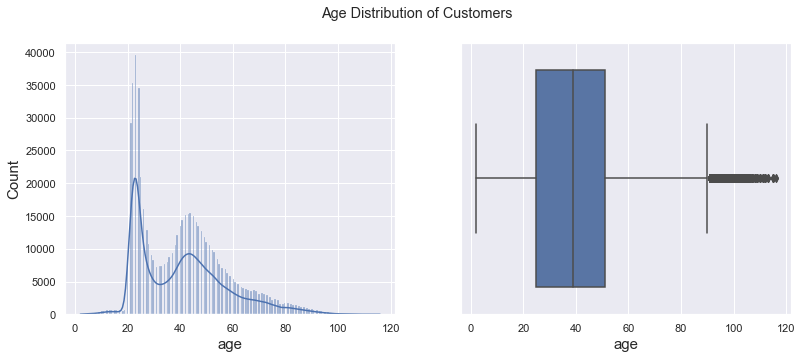

In [27]:
fig, ax = plt.subplots(1,2, figsize = (13,5));

sns.histplot(df['age'], kde = True, ax = ax[0]);
sns.boxplot(x = 'age', data = df, ax = ax[1]);

plt.suptitle("Age Distribution of Customers");

Age distribution is Bi-modal, where majority of customers are young, between the age of 20-30, followed by older customers, between the age of 40 and 50. There seems to outliers in both sides of the distribution.

In [28]:
df['age'].describe()

count    619174.000000
mean         40.492146
std          17.062744
min           2.000000
25%          25.000000
50%          39.000000
75%          51.000000
max         116.000000
Name: age, dtype: float64

There are customers as young as 2 years and customers as old as 116 years!

I will assign ages below 18 to the mean of ages between 18 and 35. For ages older than 85, I will assign a median age between 35 and 85.

In [29]:
df.query('age < 35 & age > 20')['age'].describe()

count    246067.000000
mean         25.155169
std           3.603589
min          21.000000
25%          22.000000
50%          24.000000
75%          27.000000
max          34.000000
Name: age, dtype: float64

In [30]:
df.query('age > 35 & age < 100')['age'].describe()

count    348623.00000
mean         52.40814
std          12.88718
min          36.00000
25%          43.00000
50%          49.00000
75%          59.00000
max          99.00000
Name: age, dtype: float64

In [31]:
#Ages where below 18 will be assigned as 24, and ages above 85 will be assigned as 45.
df['age'] = np.where(df['age'] < 20, 24, (np.where(df['age'] > 85, 45, df['age'])))

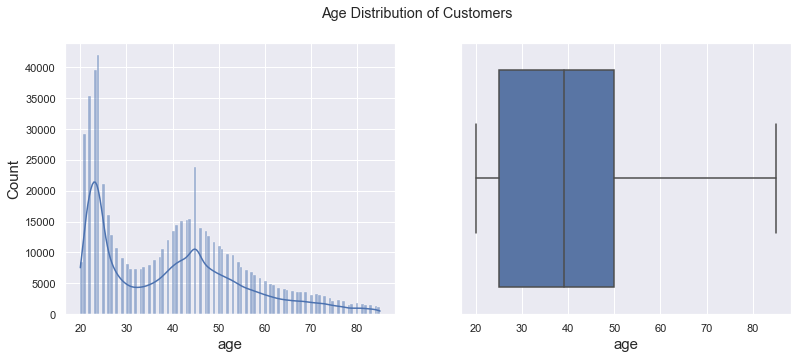

In [32]:
fig, ax = plt.subplots(1,2, figsize = (13,5));

sns.histplot(df['age'], kde = True, ax = ax[0]);
sns.boxplot(x = 'age', data = df, ax = ax[1]);

plt.suptitle("Age Distribution of Customers");

#### `fecha_alta`: the date in which the customer became as the first holder of a contract in the bank

In [33]:
print(any(df['fecha_alta'].isna())) #No missing value
print()
df['fecha_alta']

False



0         2015-01-12
1         2012-08-10
2         2012-08-10
3         2012-08-10
4         2012-08-10
             ...    
619169    2013-09-25
619170    2013-09-25
619171    2013-09-25
619172    2013-09-25
619173    2013-09-25
Name: fecha_alta, Length: 619174, dtype: object

Converting to Datetime format

In [34]:
df['fecha_alta'] = pd.to_datetime(df['fecha_alta'])

In [35]:
df['fecha_alta_year'] = df.fecha_alta.dt.year #Extracting years
df['fecha_alta_month'] = df.fecha_alta.dt.month #extracting months
df['fecha_alta_date'] = df.fecha_alta.dt.day #extracting months
df['fecha_alta_day'] = df.fecha_alta.dt.weekday #extracting day of week
df['fecha_alta_week'] = df.fecha_alta.dt.week #extracting week of year

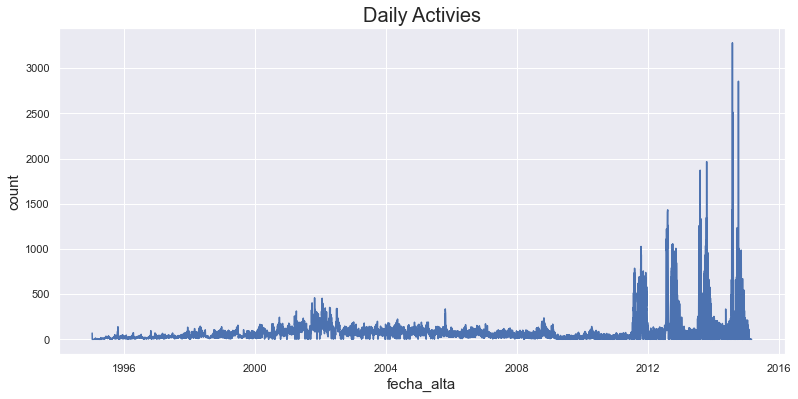

In [36]:
temp_df = df.groupby('fecha_alta').size().reset_index().rename(columns = {0:"count"})

plt.figure(figsize = (13,6));
ax = sns.lineplot(x = 'fecha_alta', y = 'count', data = temp_df);
ax.set_title("Daily Activies");

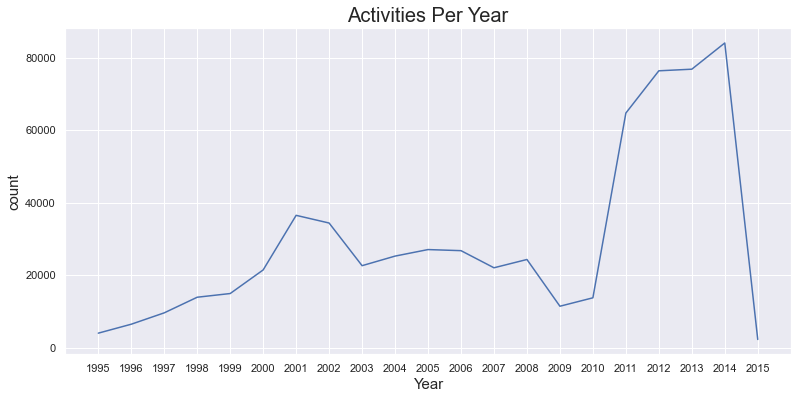

In [37]:
temp_df = df.groupby('fecha_alta_year').size().reset_index().rename(columns = {0:"count"})

plt.figure(figsize = (13,6));
ax = sns.lineplot(x = 'fecha_alta_year', y = 'count', data = temp_df);
ax.set_xticks(np.arange(1995, 2016, 1));
ax.set_title("Activities Per Year");
ax.set_xlabel("Year");

Years between 2011 and 2014 saw the highest number of applicants compared to other years

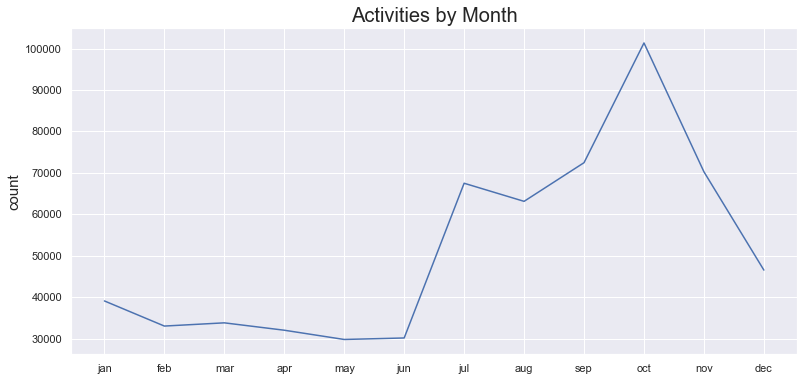

In [38]:
temp_df = df.groupby('fecha_alta_month').size().reset_index().rename(columns = {0:"count"})

plt.figure(figsize = (13,6));
ax = sns.lineplot(x = 'fecha_alta_month', y = 'count', data = temp_df);
plt.xticks(np.arange(1, 13, 1), ["jan", "feb", "mar", "apr", "may", "jun", "jul",
                                 "aug", "sep", "oct", "nov", "dec"]);
ax.set_title("Activities by Month");
ax.set_xlabel("");

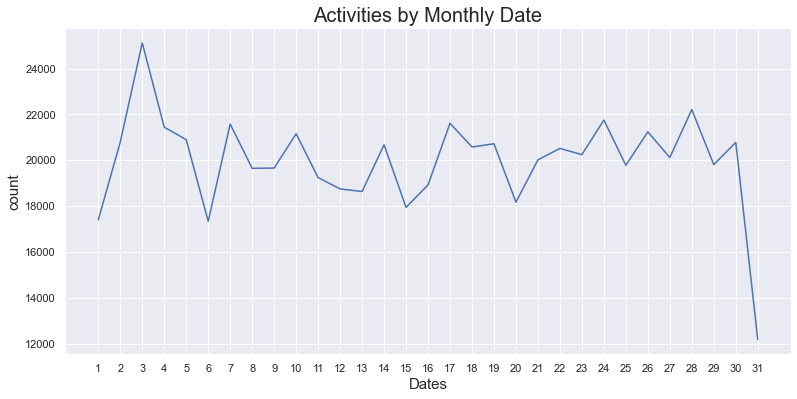

In [39]:
temp_df = df.groupby('fecha_alta_date').size().reset_index().rename(columns = {0:"count"})

plt.figure(figsize = (13,6));
ax = sns.lineplot(x = 'fecha_alta_date', y = 'count', data = temp_df);
ax.set_xticks(np.arange(1, 32, 1));
ax.set_title("Activities by Monthly Date");
ax.set_xlabel("Dates");

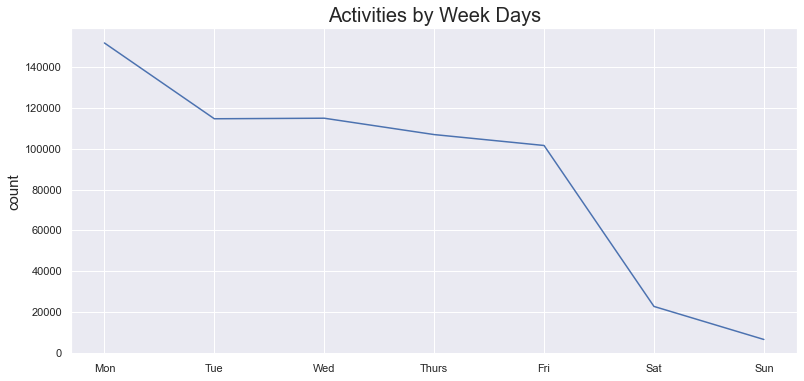

In [40]:
temp_df = df.groupby('fecha_alta_day').size().reset_index().rename(columns = {0:"count"})

plt.figure(figsize = (13,6));
ax = sns.lineplot(x = 'fecha_alta_day', y = 'count', data = temp_df);
plt.xticks(np.arange(0, 7, 1), ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']);
ax.set_title("Activities by Week Days");
ax.set_xlabel("");

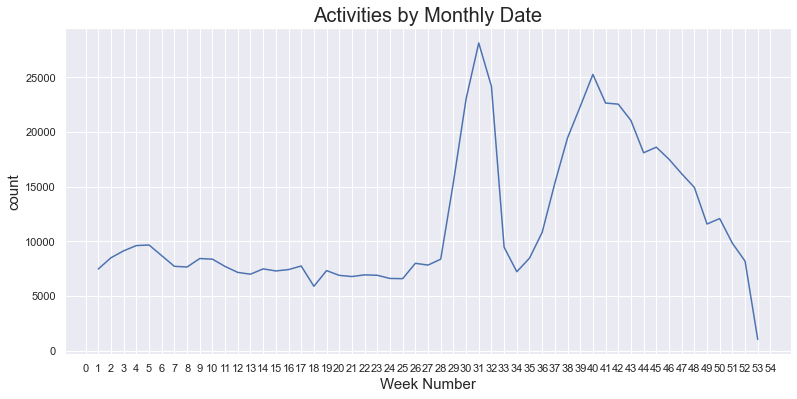

In [41]:
temp_df = df.groupby('fecha_alta_week').size().reset_index().rename(columns = {0:"count"})

plt.figure(figsize = (13,6));
ax = sns.lineplot(x = 'fecha_alta_week', y = 'count', data = temp_df);
ax.set_xticks(np.arange(0, 55, 1));
ax.set_title("Activities by Monthly Date");
ax.set_xlabel("Week Number");

In [42]:
df = df.drop('fecha_alta', axis = 1)
df

,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,...,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,fecha_alta_year,fecha_alta_month,fecha_alta_date,fecha_alta_day,fecha_alta_week
0,N,ES,H,35,0.0,6,1.0,1.0,A,S,...,0,0,0.0,0.0,0,2015,1,12,0,3
1,N,ES,V,23,0.0,35,1.0,1.0,I,S,...,0,0,0.0,0.0,0,2012,8,10,4,32
2,N,ES,V,23,0.0,35,1.0,1.0,I,S,...,0,0,0.0,0.0,0,2012,8,10,4,32
3,N,ES,H,22,0.0,35,1.0,1.0,I,S,...,0,0,0.0,0.0,0,2012,8,10,4,32
4,N,ES,V,23,0.0,35,1.0,1.0,A,S,...,0,0,0.0,0.0,0,2012,8,10,4,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619169,N,ES,H,27,0.0,22,1.0,1.0,A,S,...,0,0,0.0,0.0,1,2013,9,25,2,39
619170,N,ES,H,56,0.0,22,1.0,1.0,A,S,...,0,0,0.0,0.0,0,2013,9,25,2,39
619171,N,ES,V,39,0.0,22,1.0,1.0,A,S,...,0,0,0.0,0.0,1,2013,9,25,2,39
619172,N,ES,V,36,0.0,22,1.0,1.0,A,S,...,0,0,0.0,0.0,1,2013,9,25,2,39


#### `ind_nuevo`: New customer Index. 1 if the customer registered in the last 6 months.

In [43]:
print(any(df['ind_nuevo'].isna())) #No missing value
print()
df['ind_nuevo']

False



0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
619169    0.0
619170    0.0
619171    0.0
619172    0.0
619173    0.0
Name: ind_nuevo, Length: 619174, dtype: float64

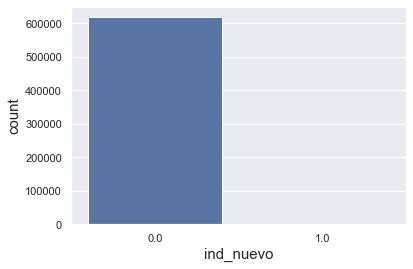

In [44]:
sns.countplot(df['ind_nuevo']);

In [45]:
df['ind_nuevo'].value_counts()

0.0    618776
1.0       398
Name: ind_nuevo, dtype: int64

#### `antiguedad`: Customer seniority (in months)

In [46]:
print(any(df['antiguedad'].isna())) #No missing value
print()
df['antiguedad']

False



0               6
1              35
2              35
3              35
4              35
           ...   
619169         22
619170         22
619171         22
619172         22
619173         22
Name: antiguedad, Length: 619174, dtype: object

In [47]:
#converting to numerical

df['antiguedad'] = df['antiguedad'].astype('int64')

In [48]:
df['antiguedad'].describe()

count    619174.000000
mean         80.290153
std        1798.578921
min     -999999.000000
25%          24.000000
50%          55.000000
75%         141.000000
max         246.000000
Name: antiguedad, dtype: float64

In [49]:
df.query("antiguedad == -999999")

,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,...,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,fecha_alta_year,fecha_alta_month,fecha_alta_date,fecha_alta_day,fecha_alta_week
409820,N,ES,V,66,0.0,-999999,1.0,1.0,A,S,...,0,0,0.0,0.0,0,2005,6,8,2,23
421610,N,ES,V,51,0.0,-999999,1.0,1.0,A,S,...,1,0,1.0,1.0,1,1999,7,16,4,28


there are couple of observations with -999999 as value. This is clearly an error. Hence, these observations will be dropped.

In [50]:
to_drop = df.query("antiguedad == -999999").index

df = df.drop(index = to_drop, axis = 0).reset_index(drop = True)

In [51]:
df['antiguedad'].describe()

count    619172.000000
mean         83.520529
std          65.180147
min           0.000000
25%          24.000000
50%          55.000000
75%         141.000000
max         246.000000
Name: antiguedad, dtype: float64

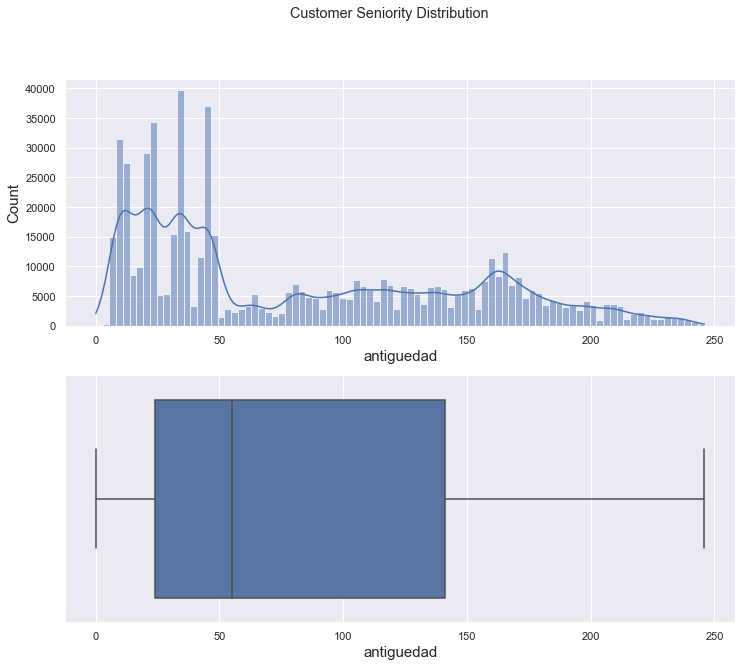

In [52]:
fig, ax = plt.subplots(2,1, figsize = (12,10));

sns.histplot(df['antiguedad'], kde = True, ax = ax[0]);
sns.boxplot(x = 'antiguedad', data = df, ax = ax[1]);

plt.suptitle("Customer Seniority Distribution");

#### `indrel`: 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)

In [53]:
print(any(df['indrel'].isna())) #No missing value
print()
df['indrel'].value_counts()

False



1.0     618399
99.0       773
Name: indrel, dtype: int64

In [54]:
df['indrel'] = df['indrel'].replace(99.0, 0.0)
df['indrel'].value_counts()

1.0    618399
0.0       773
Name: indrel, dtype: int64

In [55]:
print(any(df['indrel_1mes'].isna()))

df['indrel_1mes'].value_counts()

False


1.0    619142
3.0        29
2.0         1
Name: indrel_1mes, dtype: int64

#### `tiprel_1mes`: Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)

In [56]:
print(any(df['tiprel_1mes'].isna()))

df['tiprel_1mes'].value_counts()

False


A    324115
I    295028
P        29
Name: tiprel_1mes, dtype: int64

"P" refers to former customers. Since the bank is only interested in current customers, I will drop observations having `tripel_1mes` has "P".

In [57]:
to_drop = df.query("tiprel_1mes == 'P'").index

df = df.drop(index = to_drop, axis = 0).reset_index(drop = True)
print(df.shape)

(619143, 47)


#### `indresi`: Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)

In [58]:
print(any(df['indresi'].isna()))

df['indresi'].value_counts()

False


S    615460
N      3683
Name: indresi, dtype: int64

In [59]:
df['indresi'] = df['indresi'].map({"S" : 1, "N" : 0})
df['indresi'].value_counts()

1    615460
0      3683
Name: indresi, dtype: int64

#### `indext`: Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)

In [60]:
print(any(df['indext'].isna()))

df['indext'].value_counts()

False


N    592114
S     27029
Name: indext, dtype: int64

In [61]:
df['indext'] = df['indext'].map({"S" : 1, "N" : 0})
df['indext'].value_counts()

0    592114
1     27029
Name: indext, dtype: int64

#### `canal_entrada`: channel used by the customer to join

In [62]:
pd.set_option('display.max_columns', None)
print(df['canal_entrada'].isna().sum())
df[df['canal_entrada'].isna()]

26


,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,fecha_alta_year,fecha_alta_month,fecha_alta_date,fecha_alta_day,fecha_alta_week
30741,N,ES,H,23,1.0,0,0.0,1.0,A,1,0,NaN,N,1.0,45.0,TOLEDO,0.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,7,30,0,31
57474,N,ES,V,47,1.0,1,1.0,1.0,A,1,0,NaN,N,1.0,25.0,LERIDA,1.0,49707.87,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,12,31,0,1
98766,N,ES,V,44,0.0,58,1.0,1.0,A,1,0,NaN,N,1.0,28.0,MADRID,1.0,158917.77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,0,2010,8,23,0,34
100697,N,ES,V,42,1.0,0,1.0,1.0,I,1,0,NaN,N,1.0,28.0,MADRID,1.0,97555.77,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,2010,12,2,3,48
156776,N,ES,H,21,1.0,0,1.0,1.0,A,1,0,NaN,N,1.0,8.0,BARCELONA,0.0,131768.82,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2014,7,31,3,31
202683,N,ES,V,32,1.0,0,1.0,1.0,I,1,0,NaN,N,1.0,28.0,MADRID,0.0,31722.21,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,2014,11,19,2,47
248173,N,ES,H,66,0.0,90,1.0,1.0,A,1,0,NaN,N,1.0,36.0,PONTEVEDRA,0.0,263960.61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,2007,9,14,4,37
248395,N,ES,V,58,0.0,63,1.0,1.0,A,1,0,NaN,N,1.0,28.0,MADRID,0.0,148147.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,2006,1,28,5,4
263197,N,ES,V,62,0.0,88,1.0,1.0,A,1,0,NaN,N,1.0,28.0,MADRID,0.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,2005,4,29,4,17
296556,N,ES,H,57,0.0,59,1.0,1.0,A,1,1,NaN,N,1.0,28.0,MADRID,1.0,528905.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,0,2004,2,4,2,6


There are 26 observations with missing values. For now I will impute these with 'missing', nut I will save its indexes. This will be handy when imputing missing values later.

In [63]:
df.query('pais_residencia == "ES"')['canal_entrada'].value_counts(normalize = True)

KHE    0.344958
KAT    0.266618
KFC    0.238385
KFA    0.032970
KHD    0.009460
         ...   
KGU    0.000002
KGN    0.000002
KCT    0.000002
KDB    0.000002
KDI    0.000002
Name: canal_entrada, Length: 155, dtype: float64

In [64]:
df[df['canal_entrada'].isna()]['tiprel_1mes'].value_counts()

A    20
I     6
Name: tiprel_1mes, dtype: int64

In [65]:
df.query('tiprel_1mes == "A"')['canal_entrada'].value_counts()

KAT    112302
KFC     99836
KHE     53504
KFA     14706
KHK      4675
        ...  
KFV         1
KEF         1
KCX         1
KHO         1
KGN         1
Name: canal_entrada, Length: 148, dtype: int64

In [66]:
val = df.query("tiprel_1mes=='A' & pais_residencia=='ES' & nomprov=='MADRID'")['canal_entrada'].mode()[0]

df['canal_entrada'] = df['canal_entrada'].fillna(val)

#### `indfall`: Deceased index. N/S

In [67]:
print(any(df['indfall'].isna()))

df['indfall'].value_counts()

False


N    617557
S      1586
Name: indfall, dtype: int64

In [68]:
df['indfall'] = df['indfall'].map({"S" : 1, "N" : 0})
df['indfall'].value_counts()

0    617557
1      1586
Name: indfall, dtype: int64

#### `tipodom`: Address type. 1, primary address

In [69]:
print(any(df['tipodom'].isna()))

df['tipodom'].value_counts()

False


1.0    619143
Name: tipodom, dtype: int64

Since there is only one category for this variable, I will drop this.

In [70]:
df = df.drop('tipodom', axis = 1)
print(df.shape)

(619143, 46)


#### `cod_prov` & `nomprov`: Province code (customer's address) / Province name

In [71]:
df['cod_prov'].value_counts()

28.0    201860
8.0      53958
46.0     29219
41.0     28927
15.0     20351
30.0     18079
29.0     17602
50.0     15793
11.0     14144
3.0      13493
36.0     13204
33.0     12178
47.0     11019
35.0     10694
6.0       9209
48.0      8469
45.0      8210
18.0      7934
37.0      7760
39.0      6949
14.0      6856
10.0      6399
21.0      6062
13.0      5538
2.0       5246
7.0       5051
12.0      4746
9.0       4381
27.0      4086
32.0      4057
31.0      3987
17.0      3837
43.0      3827
26.0      3811
24.0      3708
25.0      3433
20.0      3201
38.0      2995
23.0      2849
16.0      2780
4.0       2573
19.0      2571
49.0      2389
34.0      2277
40.0      1924
22.0      1799
5.0       1788
1.0       1674
44.0      1054
42.0       759
52.0       437
51.0       314
Name: cod_prov, dtype: int64

In [72]:
df['nomprov'].value_counts()

MADRID                    201860
BARCELONA                  53958
VALENCIA                   29219
SEVILLA                    28927
CORUÑA, A                  20351
MURCIA                     18079
MALAGA                     17602
ZARAGOZA                   15793
CADIZ                      14144
ALICANTE                   13493
PONTEVEDRA                 13204
ASTURIAS                   12178
VALLADOLID                 11019
PALMAS, LAS                10694
BADAJOZ                     9209
BIZKAIA                     8469
TOLEDO                      8210
GRANADA                     7934
SALAMANCA                   7760
CANTABRIA                   6949
CORDOBA                     6856
CACERES                     6399
HUELVA                      6062
CIUDAD REAL                 5538
ALBACETE                    5246
BALEARS, ILLES              5051
CASTELLON                   4746
BURGOS                      4381
LUGO                        4086
OURENSE                     4057
NAVARRA   

Both of these variables are same since one `nomprov` is the name of the province and `cod_prov` is the number assigned to the province. Hence I will remove `cod_prov`.

In [73]:
df = df.drop('cod_prov', axis = 1)
df.shape

(619143, 45)

In [74]:
print(df['nomprov'].isna().sum())
df[df['nomprov'].isna()]

3682


,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,fecha_alta_year,fecha_alta_month,fecha_alta_date,fecha_alta_day,fecha_alta_week
2022,N,CA,V,53,0.0,35,1.0,1.0,A,0,0,KAT,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,0.0,1,2012,8,10,4,32
4121,N,CH,V,34,0.0,35,1.0,1.0,A,0,0,KFC,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,20,0,34
4320,N,CL,V,40,0.0,35,1.0,1.0,A,0,0,KAT,0,NaN,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,29,2,35
5875,N,IE,V,28,0.0,35,1.0,1.0,A,0,0,KFC,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.0,0.0,0,2012,8,6,0,32
15145,N,AT,V,43,0.0,34,1.0,1.0,A,0,1,KFA,0,NaN,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,1,2012,9,12,2,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591082,N,DE,V,43,0.0,20,1.0,1.0,A,0,0,KFC,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.0,0.0,0,2013,11,25,0,48
595866,N,ES,V,45,0.0,19,1.0,1.0,A,1,0,KFC,0,NaN,1.0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0,1.0,1,2013,12,27,4,52
599213,N,DE,V,38,0.0,19,1.0,1.0,A,0,0,KAT,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0.0,0.0,0,2013,12,13,4,50
611886,N,GB,V,36,0.0,19,1.0,1.0,A,0,0,KAT,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2013,7,11,3,28


In [75]:
# nomprov_index = df[df['nomprov'].isna()].index

# df['nomprov'] = df['nomprov'].fillna('missing')

In [76]:
df[df['nomprov'].isna()]['pais_residencia'].value_counts()

FR    288
AR    276
DE    256
GB    254
CO    201
     ... 
KZ      1
CD      1
CF      1
BZ      1
GE      1
Name: pais_residencia, Length: 113, dtype: int64

In [77]:
df.query('pais_residencia != "ES"')['nomprov'].value_counts()

MADRID         4
GUADALAJARA    1
PALMAS, LAS    1
Name: nomprov, dtype: int64

In [78]:
(df[df['nomprov'].isna()]['pais_residencia'] == "ES").sum()

5

In [79]:
%%time
for i in df[df['nomprov'].isna()].index:
    if df['pais_residencia'][i] != "ES":
        df['nomprov'][i] = "Foreign"
    else:
        df['nomprov'][i] = "MADRID"

Wall time: 5.83 s


#### `ind_actividad_cliente`: Activity index (1, active customer; 0, inactive customer)

In [80]:
print(any(df['ind_actividad_cliente'].isna()))

df['ind_actividad_cliente'].value_counts()

False


1.0    333059
0.0    286084
Name: ind_actividad_cliente, dtype: int64

#### `renta`: Gross income of the household

In [81]:
df['renta'].isna().sum()

104728

Around 100k+ missing values. 

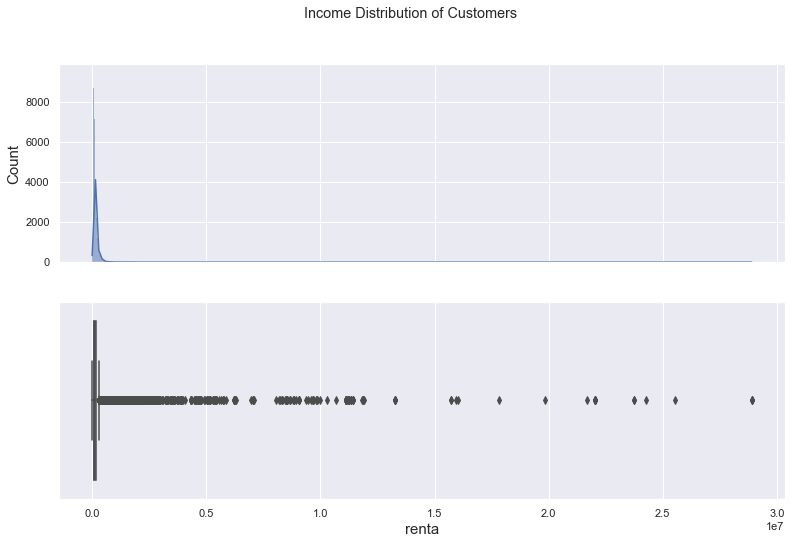

In [82]:
fig, ax = plt.subplots(2,1, figsize = (13,8), sharex = True);

sns.histplot(df['renta'], kde = True, ax = ax[0]);
sns.boxplot(x = 'renta', data = df, ax = ax[1]);

plt.suptitle("Income Distribution of Customers");

In [83]:
df['renta'].describe()

count    5.144150e+05
mean     1.346014e+05
std      2.256816e+05
min      1.202730e+03
25%      6.919879e+04
50%      1.026161e+05
75%      1.570513e+05
max      2.889440e+07
Name: renta, dtype: float64

We can see that the distribution is extremely skewed. Only fewer households earns income higher than 100k. Therefore imputing this variable with mean would not be the right approach. For all missing values acorss all variables, I will utilize MICE imputer.

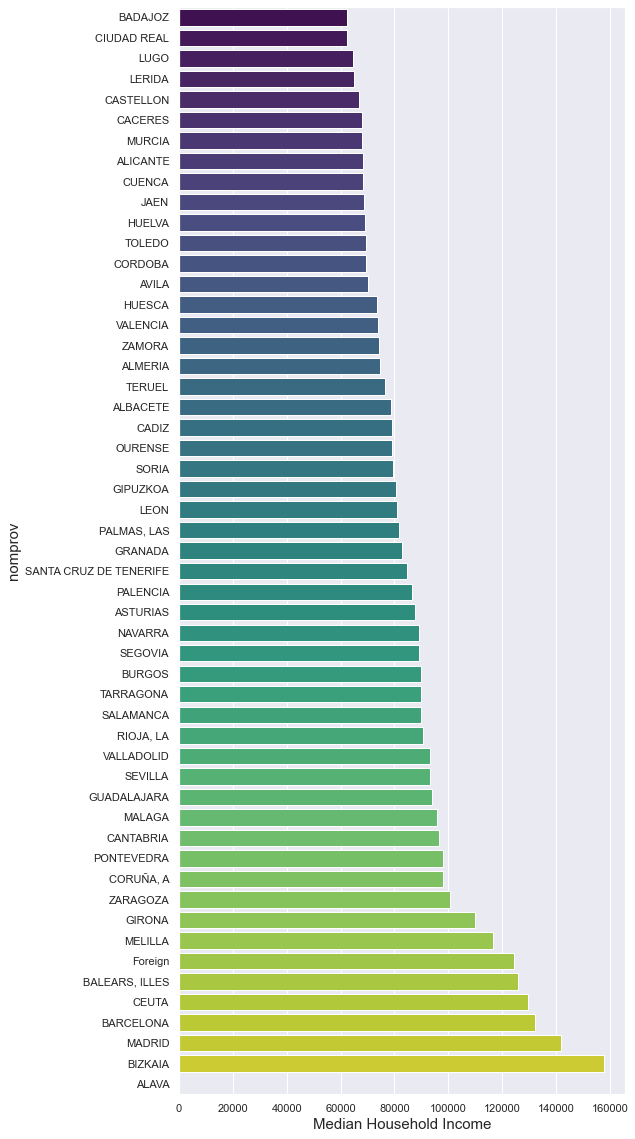

In [84]:
temp_df = df.groupby('nomprov').agg({'renta' : 'median'}).sort_values('renta').reset_index()

plt.figure(figsize = (8, 20));
sns.barplot(x = 'renta', y = 'nomprov', data = temp_df, palette = "viridis");
plt.xlabel("Median Household Income");

In [85]:
%%time
for city in df['nomprov'].unique():
    if city == "ALAVA":
        df.loc[(df['nomprov'] == f"{city}") & (df['renta'].isna()), "renta"] = \
        df['renta'].median()
    else:
        df.loc[(df['nomprov'] == f"{city}") & (df['renta'].isna()), "renta"] = \
        df.query(f'nomprov == "{city}"')['renta'].median()

Wall time: 5.34 s


In [86]:
df.isna().sum()

ind_empleado              0
pais_residencia           0
sexo                      0
age                       0
ind_nuevo                 0
antiguedad                0
indrel                    0
indrel_1mes               0
tiprel_1mes               0
indresi                   0
indext                    0
canal_entrada             0
indfall                   0
nomprov                   0
ind_actividad_cliente     0
renta                     0
ind_ahor_fin_ult1         0
ind_aval_fin_ult1         0
ind_cco_fin_ult1          0
ind_cder_fin_ult1         0
ind_cno_fin_ult1          0
ind_ctju_fin_ult1         0
ind_ctma_fin_ult1         0
ind_ctop_fin_ult1         0
ind_ctpp_fin_ult1         0
ind_deco_fin_ult1         0
ind_deme_fin_ult1         0
ind_dela_fin_ult1         0
ind_ecue_fin_ult1         0
ind_fond_fin_ult1         0
ind_hip_fin_ult1          0
ind_plan_fin_ult1         0
ind_pres_fin_ult1         0
ind_reca_fin_ult1         0
ind_tjcr_fin_ult1         0
ind_valo_fin_ult1   

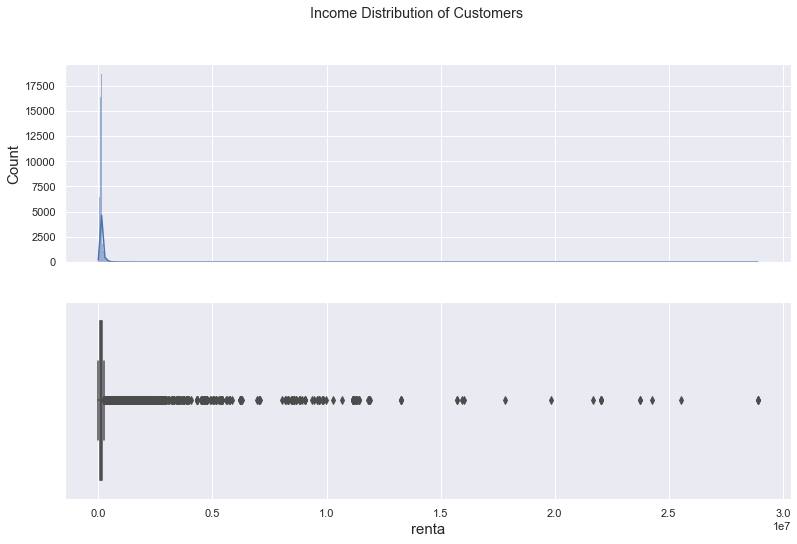

In [87]:
fig, ax = plt.subplots(2,1, figsize = (13,8), sharex = True);

sns.histplot(df['renta'], kde = True, ax = ax[0]);
sns.boxplot(x = 'renta', data = df, ax = ax[1]);

plt.suptitle("Income Distribution of Customers");

In [88]:
df['renta'].describe()

count    6.191430e+05
mean     1.293462e+05
std      2.064071e+05
min      1.202730e+03
25%      7.123038e+04
50%      9.874536e+04
75%      1.466760e+05
max      2.889440e+07
Name: renta, dtype: float64

In [89]:
class num_transformer:
    def __init__(self, x, variable):
        self.x = x
        self.variable = variable

    def var_transform_plots(self):
    
        import scipy.stats as stats

        fig, ax = plt.subplots(1,3, figsize = (15,5))

        sns.histplot(self.x[self.variable], kde = True, ax = ax[0]);
        sns.boxplot(self.x[self.variable], ax = ax[1]);
        stats.probplot(self.x[self.variable], dist="norm", plot=plt);
        plt.suptitle('Current Distribution', fontsize = 20)

        import feature_engine.transformation as vt
        
        self.log = vt.LogTransformer()
        self.recipr = vt.ReciprocalTransformer()
        self.exp = vt.PowerTransformer()
        self.boxcox = vt.BoxCoxTransformer()
        self.yeojohn = vt.YeoJohnsonTransformer()
        
        transformation_dict = dict(
            log = self.log, 
            reciper = self.recipr, 
            exp = self.exp, 
            boxcox = self.boxcox, 
            yeojohn = self.yeojohn 
        )

        for name, trnfm in transformation_dict.items():
            try:
                self.x[name + '_' + self.variable] = trnfm.fit_transform(self.x[self.variable].to_frame())

            except ValueError:
                print(f"""
                      Some variables contain zero or negative values, can't apply {type(trnfm).__name__}
                """)
                continue

            else:
                fig, ax = plt.subplots(1,3, figsize = (15,5))
                sns.histplot(self.x[name + '_' + self.variable], 
                             kde = True, ax = ax[0]).set(xlabel=self.variable);
                
                sns.boxplot(self.x[name + '_' + self.variable], 
                            ax = ax[1]).set(xlabel=self.variable);
                
                stats.probplot(self.x[name + '_' + self.variable], 
                               dist="norm", 
                               plot=plt);
                
                plt.suptitle(type(trnfm).__name__, fontsize = 20)
                plt.show()
         
        print("#" * len('Normality Tests:'))
        print('Normality Tests:')        
        print("#" * len('Normality Tests:'))
        print()
        print("Null hypothesis: Variable comes from a normal distribution")
        print()
        
        cols = self.x.iloc[:, -5:].columns
        alpha = 1e-3
        
        for col in cols:
            k2, p = stats.normaltest(self.x[col].values)
            print(f'{col} P-Val: {p:.4f}')
            if p < alpha: 
                print(f"Reject H0, {col} is not normally distributed")
            else:
                print(f"Cannot Reject H0, {col} is normally distributed")
            print()

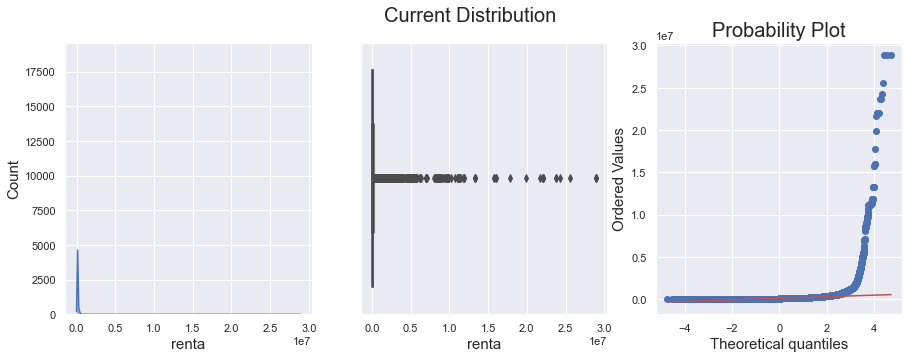

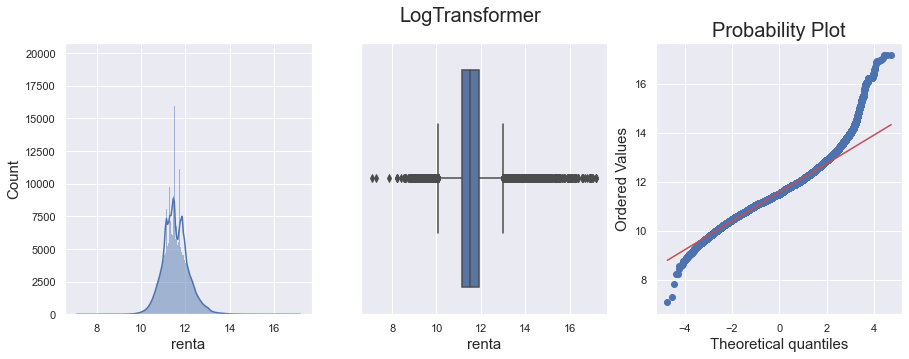

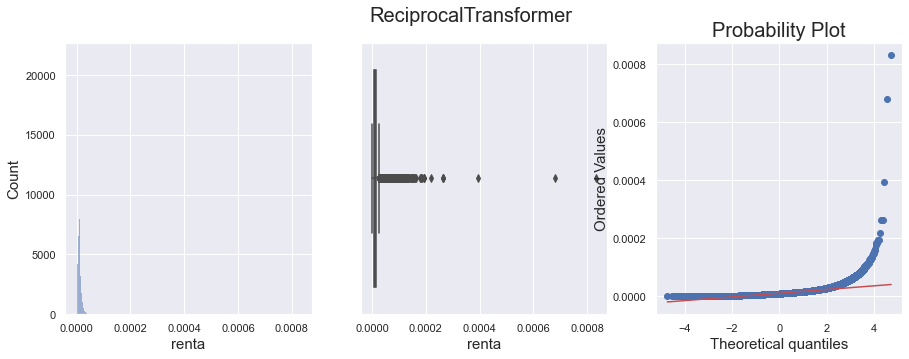

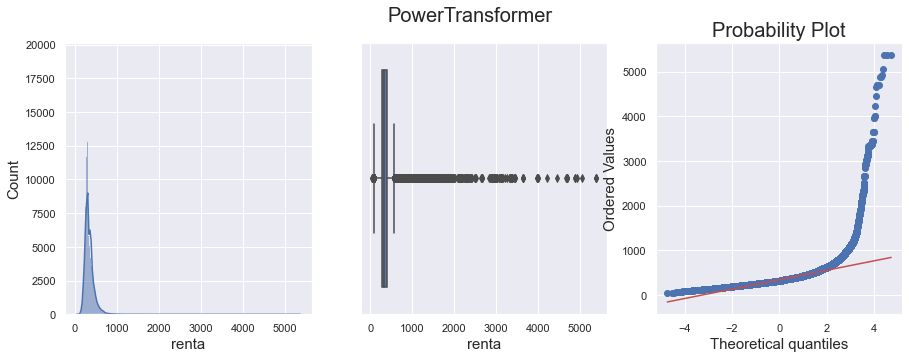

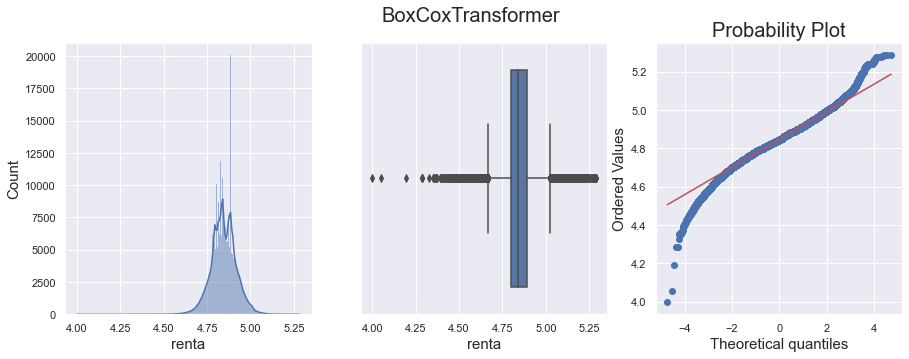

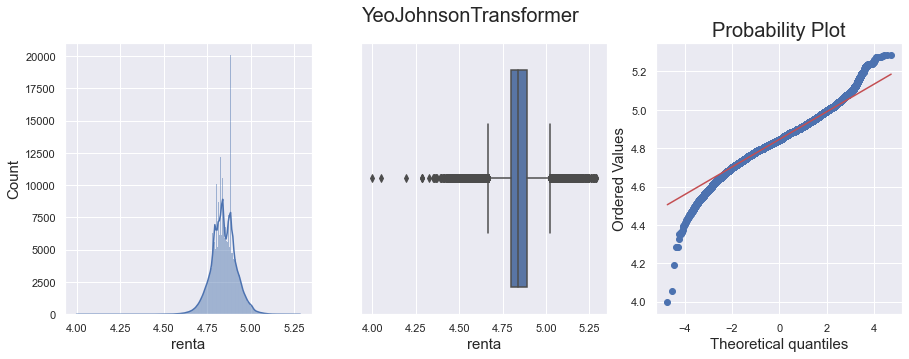

################
Normality Tests:
################

Null hypothesis: Variable comes from a normal distribution

log_renta P-Val: 0.0000
Reject H0, log_renta is not normally distributed

reciper_renta P-Val: 0.0000
Reject H0, reciper_renta is not normally distributed

exp_renta P-Val: 0.0000
Reject H0, exp_renta is not normally distributed

boxcox_renta P-Val: 0.0000
Reject H0, boxcox_renta is not normally distributed

yeojohn_renta P-Val: 0.0000
Reject H0, yeojohn_renta is not normally distributed



In [90]:
num_transformer(df, "renta").var_transform_plots()

In [91]:
df = df.drop(['renta', 'log_renta', 'reciper_renta', 'exp_renta', 'yeojohn_renta'], axis = 1)

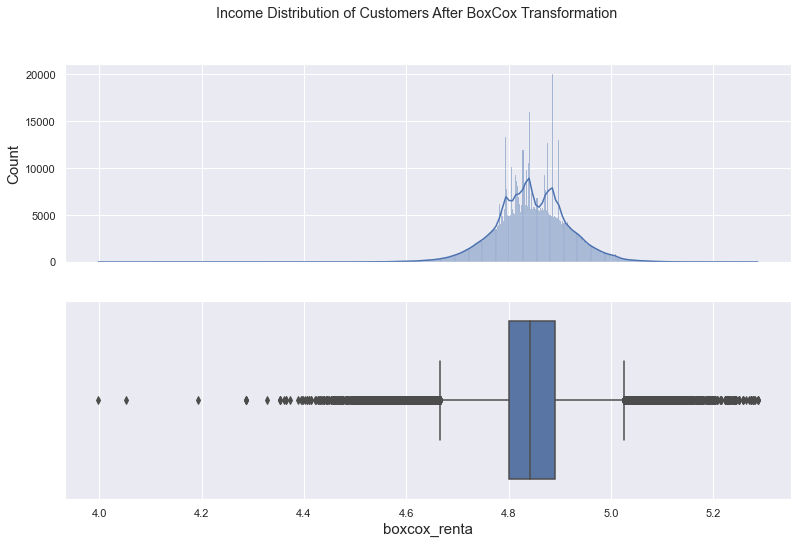

In [92]:
fig, ax = plt.subplots(2,1, figsize = (13,8), sharex = True);

sns.histplot(df['boxcox_renta'], kde = True, ax = ax[0]);
sns.boxplot(x = 'boxcox_renta', data = df, ax = ax[1]);

plt.suptitle("Income Distribution of Customers After BoxCox Transformation");

In [93]:
df.shape

(619143, 45)

In [94]:
from feature_engine.outliers import Winsorizer

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['boxcox_renta'])

df = windsoriser.fit_transform(df)

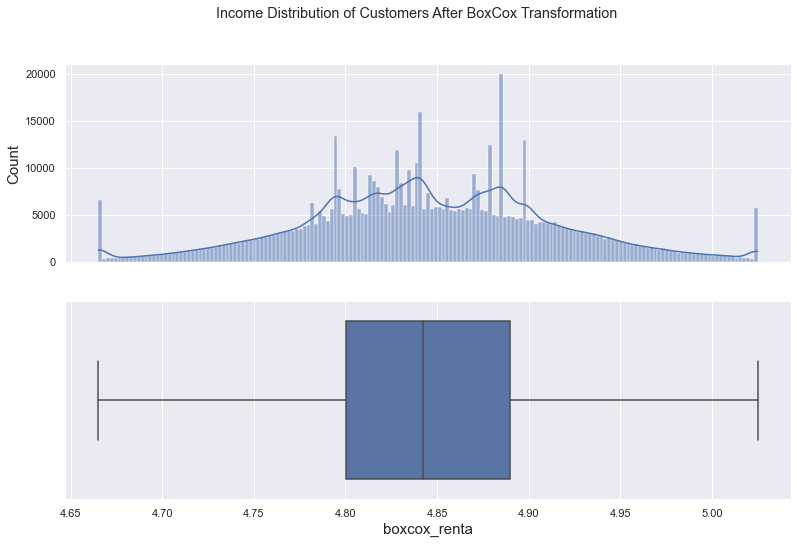

In [95]:
fig, ax = plt.subplots(2,1, figsize = (13,8), sharex = True);

sns.histplot(df['boxcox_renta'], kde = True, ax = ax[0]);
sns.boxplot(x = 'boxcox_renta', data = df, ax = ax[1]);

plt.suptitle("Income Distribution of Customers After BoxCox Transformation");

In [96]:
df.shape

(619143, 45)

### Bank Products

In [99]:
prod_cols = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 
             'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
             'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 
             'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 
             'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
             'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

labels = [
    "Saving Account", "Guarantees", "Current Accounts", "Derivada Account", "Payroll Account",
    "Junior Account", "Más particular Account", "particular Account", "particular Plus Account",
    "Short-term deposits", "Medium-term deposits", "Long-term deposits", "e-account", 
    "Funds", "Mortgage", "Pensions", "Loans", "Taxes", "Credit Card", "Securities", 
    "Home Account", "Payroll", "Pensions", "Direct Debit"
]

In [100]:
for col, name  in zip(prod_cols, labels):
    print(col, ":", name)
    print("-" * 50)
    print(f'Missing Values: {df[col].isna().sum()}')
    print("Value Counts")
    print(df[col].value_counts())
    print()

ind_ahor_fin_ult1 : Saving Account
--------------------------------------------------
Missing Values: 0
Value Counts
0    619054
1        89
Name: ind_ahor_fin_ult1, dtype: int64

ind_aval_fin_ult1 : Guarantees
--------------------------------------------------
Missing Values: 0
Value Counts
0    619123
1        20
Name: ind_aval_fin_ult1, dtype: int64

ind_cco_fin_ult1 : Current Accounts
--------------------------------------------------
Missing Values: 0
Value Counts
1    484897
0    134246
Name: ind_cco_fin_ult1, dtype: int64

ind_cder_fin_ult1 : Derivada Account
--------------------------------------------------
Missing Values: 0
Value Counts
0    618843
1       300
Name: ind_cder_fin_ult1, dtype: int64

ind_cno_fin_ult1 : Payroll Account
--------------------------------------------------
Missing Values: 0
Value Counts
0    559941
1     59202
Name: ind_cno_fin_ult1, dtype: int64

ind_ctju_fin_ult1 : Junior Account
--------------------------------------------------
Missing Values: 0

In [124]:
df['ind_nomina_ult1'] = df['ind_nomina_ult1'].fillna(df['ind_nomina_ult1'].mode()[0])
df['ind_nom_pens_ult1'] = df['ind_nom_pens_ult1'].fillna(df['ind_nom_pens_ult1'].mode()[0])

In [125]:
df.isna().sum()

ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
nomprov                  0
ind_actividad_cliente    0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
ind_plan_fin_ult1        0
ind_pres_fin_ult1        0
ind_reca_fin_ult1        0
ind_tjcr_fin_ult1        0
ind_valo_fin_ult1        0
ind_viv_fin_ult1         0
ind_nomina_ult1          0
i

All missing values has been taken care of!

In [126]:
product_df = df.groupby('age').agg({col : 'sum' for col in prod_cols})
product_df

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
age,,,,,,,,,,,,,,,,,,,,,,,,
20,0,0,7869,0,97,287,21,0,0,8,0,9,253,2,0,0,0,2,6,4,0,23.0,26.0,154
21,0,0,28530,0,286,0,9,0,0,6,2,37,488,11,0,0,0,19,22,8,0,109.0,131.0,694
22,0,0,34457,0,448,1,2,0,0,5,1,48,581,15,0,1,1,48,28,13,0,173.0,202.0,1197
23,0,0,38442,0,652,2,16,303,1,0,1,49,348,17,0,2,0,74,66,24,0,267.0,299.0,1442
24,0,0,33514,0,626,7305,124,381,0,6,1,92,236,12,2,1,0,98,58,29,0,282.0,321.0,1356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0,0,1177,1,79,0,27,791,106,2,14,273,194,83,0,4,1,67,44,88,3,3.0,73.0,124
82,0,0,1060,1,68,0,20,704,84,6,7,194,178,67,0,2,0,59,45,76,3,2.0,64.0,103
83,0,0,994,0,60,0,17,649,84,3,7,207,151,56,0,3,1,40,28,67,1,3.0,56.0,90


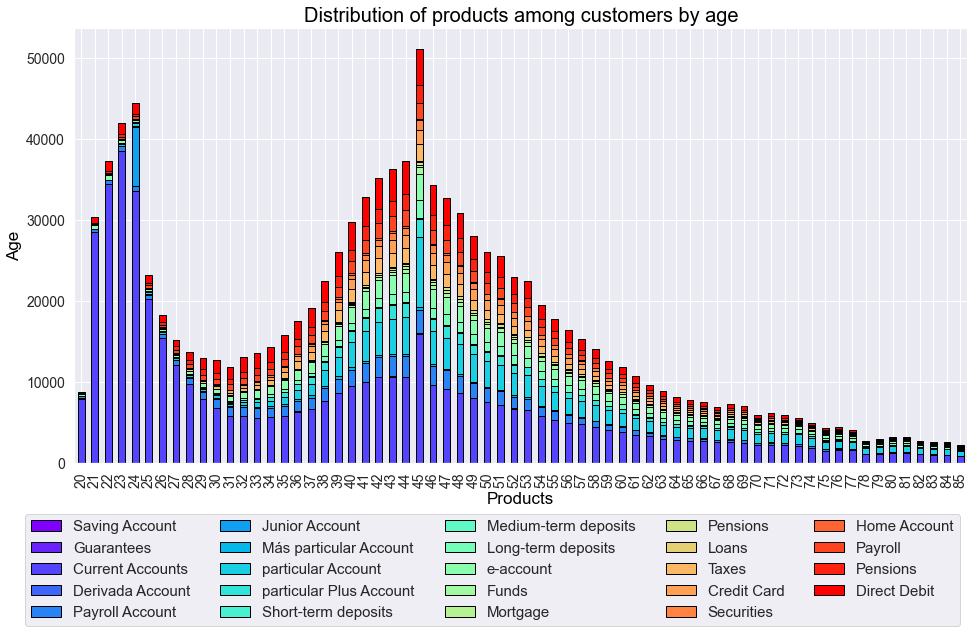

In [127]:
product_df.plot(kind='bar', stacked=True, fontsize=14, figsize=[16,8], colormap='rainbow', 
               edgecolor = "black")
plt.title('Distribution of products among customers by age', fontsize=20, color='black') 
plt.xlabel('Products', fontsize=17, color='black') 
plt.ylabel('Age', fontsize=17, color='black') 
# plt.ticklabel_format(style = 'plain')
plt.legend(labels = labels, prop={'size':15}, loc=1, bbox_to_anchor=(1.0, -0.1), ncol = 5);

Above graph referred from [here](https://medium.com/@ravitee/santander-product-recommendation-ee4122d15072)

In [128]:
prod_prop = product_df.div(product_df.sum(axis = 1), axis = 0)

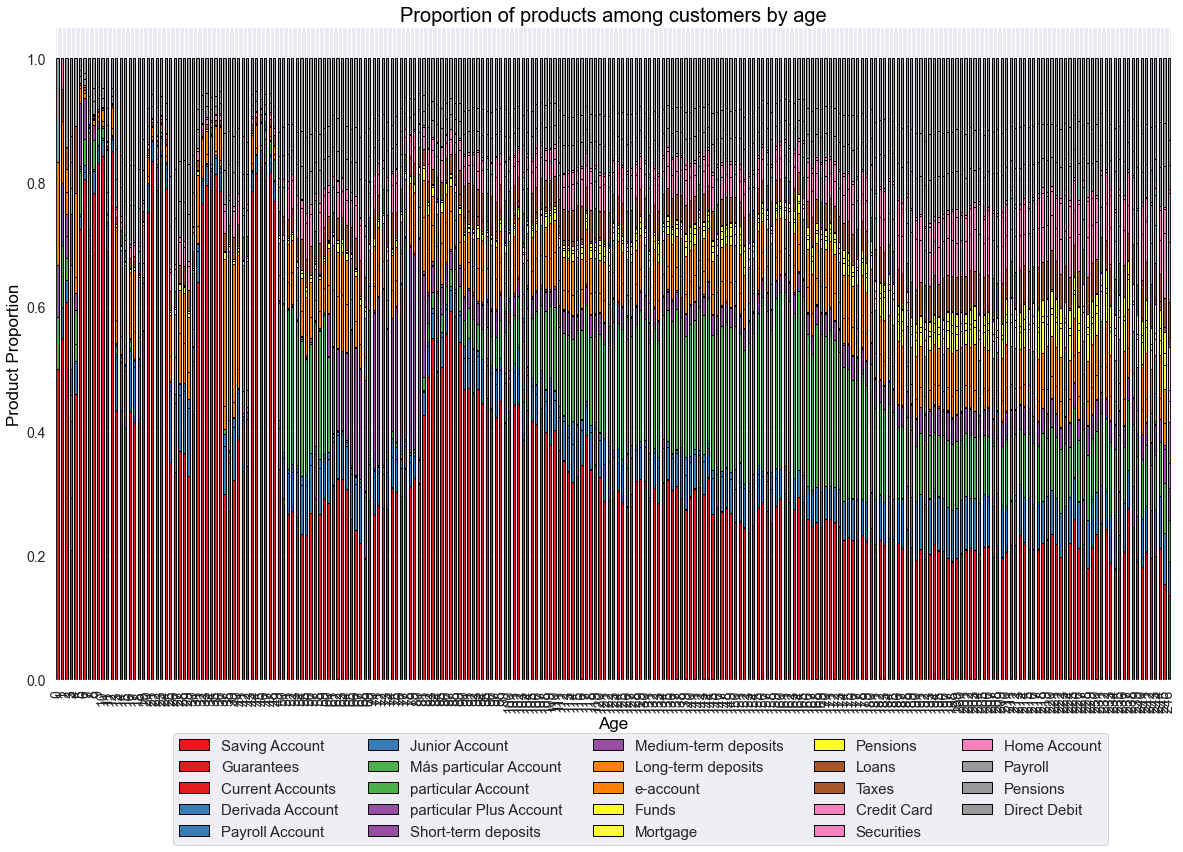

In [132]:
prod_prop.plot(kind = 'bar', stacked = True, fontsize=14, figsize=[20,12], colormap='Set1', 
               edgecolor = "black");

plt.title('Proportion of products among customers by age', fontsize=20, color='black') ;
plt.xlabel('Age', fontsize=17, color='black') ;
plt.ylabel('Product Proportion', fontsize=17, color='black') ;
plt.legend(labels = labels, prop={'size':15}, loc=1, bbox_to_anchor=(0.95, -0.07), ncol = 5);

Customer with age above 25 opt for more products from the bank.

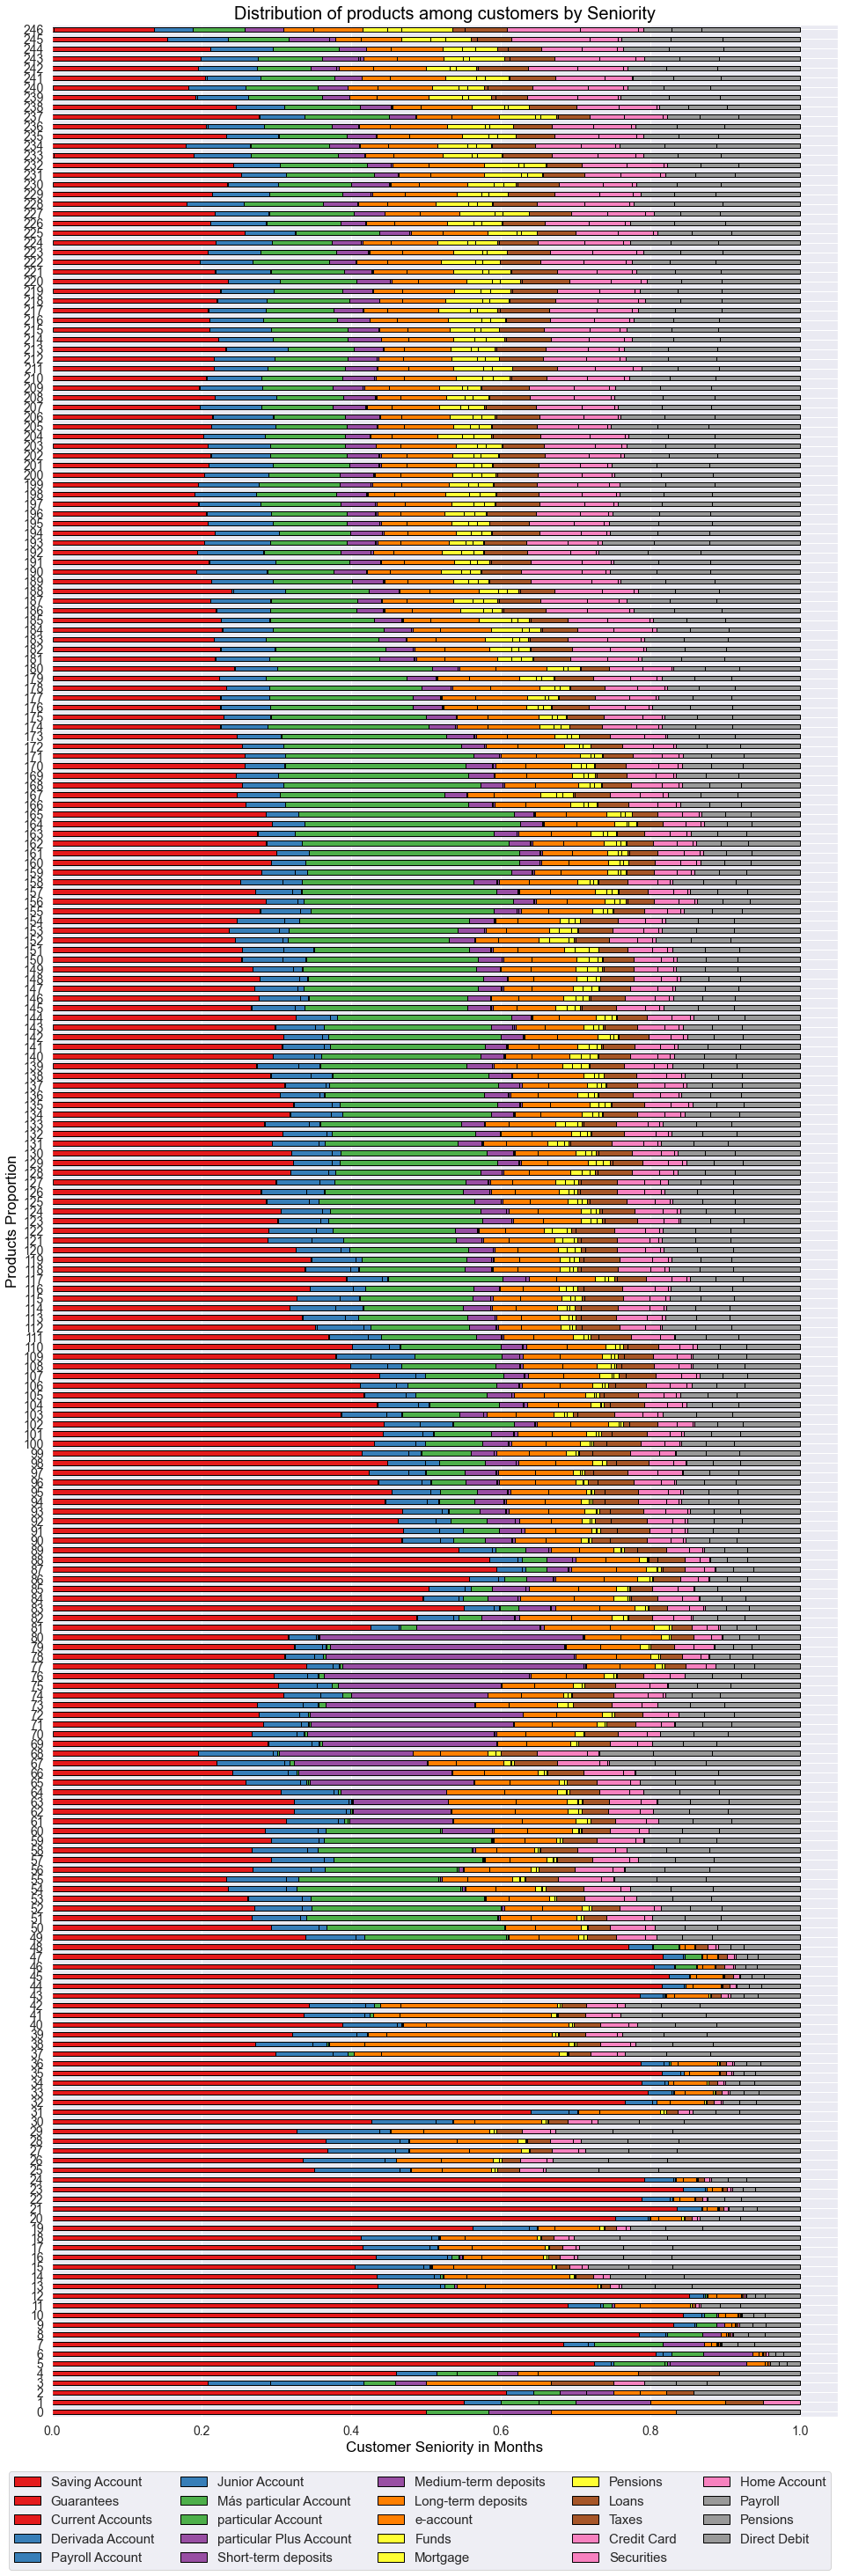

In [130]:
senior_product = df.groupby('antiguedad').agg({col : 'sum' for col in prod_cols})

prod_prop = senior_product.div(senior_product.sum(axis = 1), axis = 0)

prod_prop.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,50], colormap='Set1', 
               edgecolor = "black");
plt.title('Distribution of products among customers by Seniority', fontsize=20, color='black') 
plt.ylabel('Products Proportion', fontsize=17, color='black') 
plt.xlabel('Customer Seniority in Months', fontsize=17, color='black') 
plt.legend(labels = labels, prop={'size':15}, loc=1, bbox_to_anchor=(1.0, -0.02), ncol = 5);

In [133]:
df.columns

Index(['ind_empleado', 'pais_residencia', 'sexo', 'age', 'ind_nuevo',
       'antiguedad', 'indrel', 'indrel_1mes', 'tiprel_1mes', 'indresi',
       'indext', 'canal_entrada', 'indfall', 'nomprov',
       'ind_actividad_cliente', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1',
       'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1', 'fecha_alta_year', 'fecha_alta_month',
       'fecha_alta_date', 'fecha_alta_day', 'fecha_alta_week', 'boxcox_renta'],
      dtype='object')

In [134]:
cat_cols = ['ind_empleado', 'pais_residencia', 'sexo', 'ind_nuevo', 'indrel', 'indrel_1mes', 
            'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 
            'ind_actividad_cliente', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 
            'ind_cder_fin_ult1',  'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1',
            'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',  'ind_deme_fin_ult1', 
            'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 
            'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
            'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 
            'ind_recibo_ult1']

In [135]:
num_cols = df.columns.difference(cat_cols)

In [136]:
mult_cat_cols = ['ind_empleado', 'pais_residencia', 'sexo', 'indrel_1mes', 
                 'tiprel_1mes', 'canal_entrada', 'nomprov']

In [ ]:
# from feature_engine.encoding import CountFrequencyEncoder

# encoder = CountFrequencyEncoder('count', variables = mult_cat_cols, ignore_format=True)
# trnsfd_df = encoder.fit_transform(df)